<b>Machine Learning Exercise session: 02 October 2025</b>

# <b>Working with: Dimensionality Reduction and PCA</b>

Welcome to this week's exercise session. Today, we will learn about _PCA_. This notebook will take you through 
- Dimensionality Reduction
- Principal Component Analysis (PCA)
- Classification

The exercises are structured in 3 sections (Theory-t, Application-a, Exploration-e). 

Here is a table to guide you through this sheet:

|To Do|Ex|
|----|--|
|First||
|Then||
|Last||

Remember 
- It is good practice to use the Machine Learning python environment you made in week 1. *Ensure that you are working within the virtual environment (venv) with **conda activate ml**. where **ml** is the name of the venv, and/or selecting it on VSCode/Jupyter*
- Solving these exercises is supposed to take much longer than 90 minutes. Work on them before going to class.
- Learning Machine Learning is challenging. Take your time, make some errors, and read the documentation if needed. <b>We are happy to help if you are stuck.</b>
- **None of the exercises are mandatory, do your best to solve them! Every weekend solutions will be published!**
- *Remember to provide a Feedback on this Exercise sheet on the LearnIT page of the course so we can make an even better exercise session!*

Have fun! 

# <b>Exploring theoretical background</b>

# Exercise t0
***Disclaimer :** This exercise is made for you to get an intuition on the Loss matrix. In doing so, you are free to sketch on paper or to code your solution.*


Inspired by the notes on PartialDerivatvesPCA, you decide to carry through the same proof as preparation for the exam.

Let $S$ be a symmetric matrix, and let $f \colon \mathbb{R}^p \rightarrow \mathbb{R}$ be a real-valued function defined by:

$$
f(v) = v^T S v
$$

where $v \in \mathbb{R}^p$ is a column vector. Then the partial derivative of $f$ with respect to $v$ is:

$$
\frac{\partial f}{\partial v} = 2Sv
$$

In [ ]:
# Solutions if needed

""" 
v^T*S*V is a quadratic form. If S=S^T/symmetric, then if we take the gradient with respect to v become 2Sv.

Expanding the expression we get
f = sum(p, i=1)sum(p, j=1) vi * S_ij * vj
taking the partial derivative in respect to vk
= sum(p, j=1)Skjvj + sum(p,i=1)vi*Sik rewriting this into vector form we get
Sv+S^Tv, since S=S^T the expression become the same and we get 2Sv 

"""

# Exercise t1


In the **Section 12.1** in *Pattern Recognition and Machine Learning* by Christopher Bishop, you can learn more about the theoretical background behind PCA and about the powerful tool of *Lagrange multipliers*.

1. Leverage that knowledge to derive the *eigenvalues and eigenvectors* for the PCA in the one dimensional case.
   - *Hint:* Follow **Section 12.1.1**
3. What do you think is going to happen in the case of $M$-dimensions?

In [ ]:
# Solutions if needed

""" 
We want to maximize u^TSu or v^TSv
our appropriate constraint comes from the normalization condition that u^Tu=1, the product of the two vectors.
We enforce the constraint using lagrange, which is denoted by lambda -> I will denote by A.

We make an unconstrained maximization function

uTSu+A(1-uTu)
Doing the derivative in respect for u/ the D-dimensional vector u and set it equal to zero. It will quantify to having a stationary point
Su=Au
this reminds of eigenvalues and vectors, which says that u must be an eigenvector for S. If we multiply by u^t and take use of the constraint
we see that the variance is given by
uTSu=A
and so the variance will be a maximum when we set Ul equal to the eigenvector
having the largest eigenvalue AI




We want to find a direction (a vector) that makes the spread or variance of the data as large as possible.
To make the problem meaningful, we force the vector to have length one. That way we don’t accidentally increase the result just by scaling the vector longer.
To enforce this length rule while still maximizing, we use a Lagrange multiplier. This lets us combine both goals — maximizing and keeping the vector normalized — into a single expression.
When we take the derivative of the expression, each component of the vector appears twice (once on the left and once on the right), so we get two similar terms. That is why a factor of two appears during differentiation.
The constraint also produces a factor of two when differentiated, so the two factors cancel each other out. That is why the final equation has no twos left in it.
The result tells us that the vector we are looking for has to be an eigenvector of the matrix we started with, and the value of the objective function is the corresponding eigenvalue.
Therefore, the direction that gives the largest variance is the eigenvector with the largest eigenvalue.

"""


# Exercise t2

Having learned about *eigenvectors and PCA*, you want to prove that they form a good alternative basis for the data.

Let $S$ be a real symmetric covariance matrix (i.e. $S = S^T$). Suppose $u_i$ and $u_j$ are eigenvectors of $S$ corresponding to distinct eigenvalues $\lambda_i$ and $\lambda_j$:

$$
S u_i = \lambda_i u_i, \quad S u_j = \lambda_j u_j
$$

The eigenvectors are orthogonal if $u_i^T u_j = 0$

1. Prove the stament above.
2. What can you say about orthonormality?
3. Are they providing a good new basis?

In [57]:
# Solution if you want to code...

""" 
a = eigenvalue i and b = eigenvalue j
Sui=au_i
Suj=buj
Taking the dot product uj with Sui
uj^T*(Sui)=a*(uj^Tui)
Because S is symmetric, we can move it
(S*uj)^Tui=(b*uj)^T*ui=b*(uj^Tui)
so we get two expression of a*(uj^Tui) and b*(uj^Tui)
b*(uj^Tui) = a*(uj^Tui), if a!=b, the only way this can be true is if uj^T*ui=0.




"""

# <b>Applying what you learned</b>

### Documentation

LIBRARIES AND METHODS EXPECTED TO BE USED:
- numpy : https://numpy.org/doc/stable/index
- pandas : https://pandas.pydata.org/pandas-docs/stable/
- matplotlib.pyplot : https://matplotlib.org/stable/tutorials/pyplot.html
- scipy.stats : https://docs.scipy.org/doc/scipy/tutorial/stats.html
- sklearn : https://sklearn.org/stable/getting_started.html
  - datasets : https://scikit-learn.org/stable/api/sklearn.datasets.html
  - linear_model : https://sklearn.org/stable/api/sklearn.linear_model.html
  - model_selection : https://sklearn.org/stable/api/sklearn.model_selection.html
  - metrics : https://scikit-learn.org/stable/api/sklearn.metrics.html

# Exercise a1

***Disclaimer:** As stated above, it's not expected to fully finish this exercise. There are multiple ways of approaching it. It is highly encouraged to go through the main points, reflecting on the meaning of classification.*

During late spring, at the Botanical Garden in Copenhagen, the blooming of **irises** takes place. Here are three species of the iris genus that have been labeled properly. What do you think are the *principal components* composed of?

![Iris_photos](iris_flower_dataset.png)

Turns out that are a composition of length and width of **petals and sepals**.

![Flower_Power](iris_flower_sepal_and_petal.png)

1. Inspect the dataset using a pairplot
2. Plot the variation of the different species across the four properties (length-width for sepal-petal)
3.       Use sklearn.decomposition.PCA to find the principal components. How many can you use? Why? 
   - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
4. Plot the new dataset onto the principal axes (2D scatterplot). Which combination retain the most information?
5. EXTRA: do a 3D plot of the dataset onto the eigenvectors. What can you see?
6. Evaluate the variance explained for each components.
   - *Hint:* Read the attributes in the PCA documentation
   - Make a *scree plot*. How many principal components would you choose?
7. Inspect the dataset after PCA is applied. What do you notice?

[0.92461872 0.05306648 0.01710261]


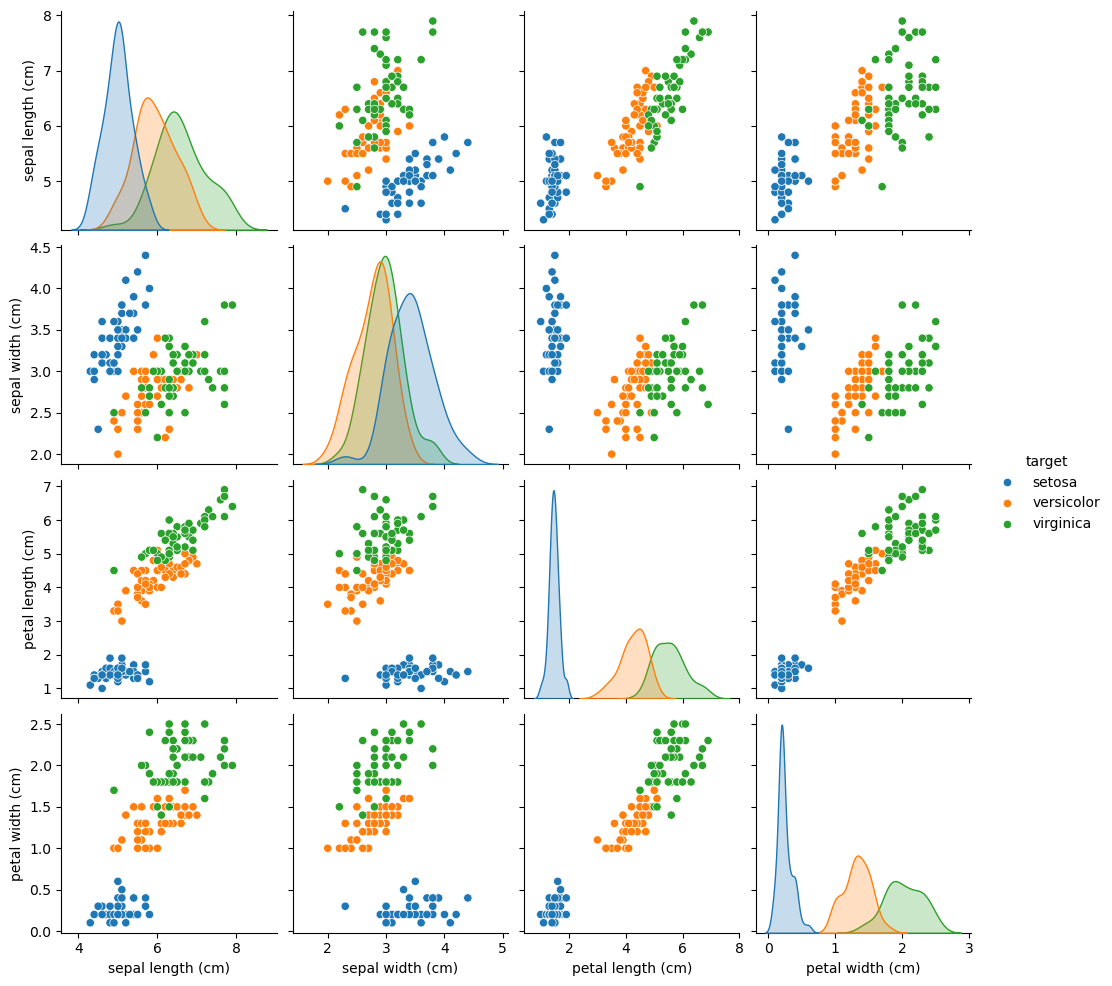

In [23]:
# Solution

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

iris = load_iris(as_frame=True)
df = iris.frame
n_components = 3 # Select number of components
#Rename classes using the iris target names
iris.frame["target"] = iris.target_names[iris.target]
pca = PCA(n_components=n_components)
#Perform PCA to reduce to 3 components
X_reduced = pca.fit_transform(iris.data)
print(pca.explained_variance_ratio_)
sns.pairplot(df, hue="target")


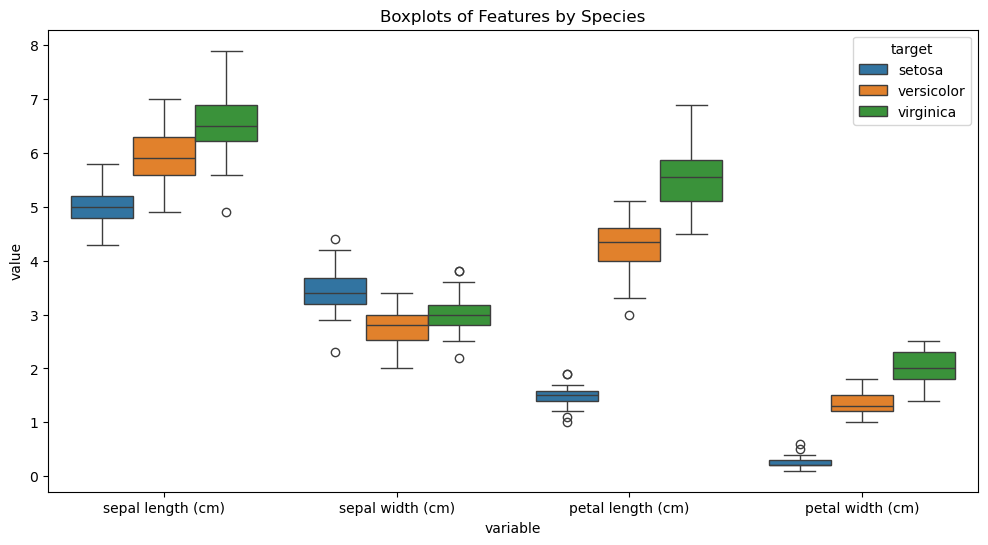

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue='target',
            data=pd.melt(df, id_vars='target'))
plt.title("Boxplots of Features by Species")
plt.show()

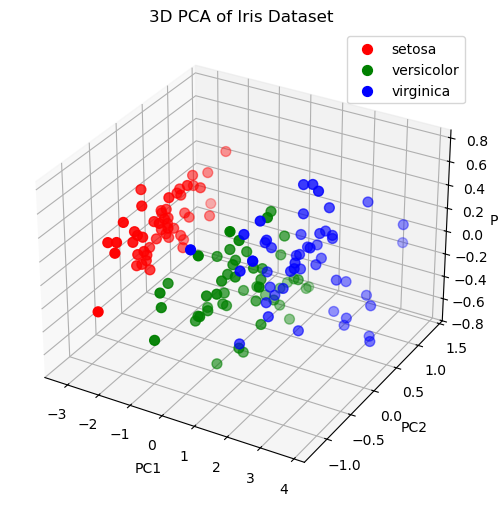

In [24]:
df_pca = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', "PC3"])
df_pca['species'] = df["target"] # add species labels
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

for species, color in colors.items():
    subset = df_pca[df_pca['species'] == species]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=species, color=color, s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA of Iris Dataset')
ax.legend()
plt.show()

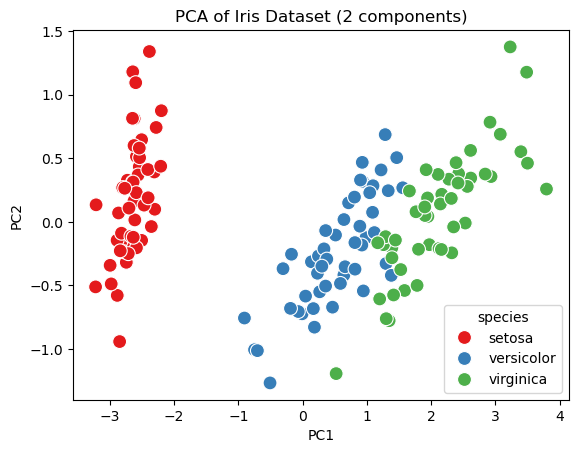

In [21]:
df_pca = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_pca['species'] = df["target"] # add species labels


sns.scatterplot(x='PC1', y='PC2', hue='species', data=df_pca, palette='Set1', s=100)
plt.title('PCA of Iris Dataset (2 components)')
plt.show()

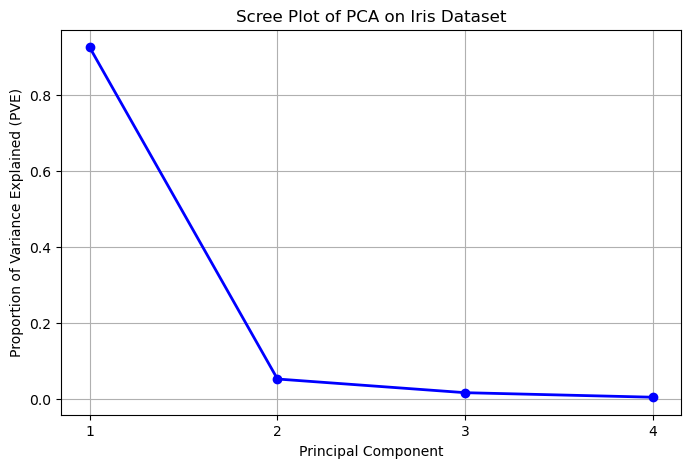

In [22]:
pca = PCA()
pca.fit(iris.data)

pve = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pve)+1), pve, 'o-', linewidth=2, color='blue')
plt.xticks(range(1, len(pve)+1))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (PVE)')
plt.title('Scree Plot of PCA on Iris Dataset')
plt.grid(True)
plt.show()

# Exercise a2

Inspired by the beautiful paper provided as additional reading: *"Who wrote the 15th book of Oz?"*, you decide to replicate the main results in it.
In his work, *JNG Binongo* uses the fantasy stories in the world of OZ to identify who wrote *The Royal Book of OZ* by using PCA.

The books are openly available thanks to Project Gutenberg (https://www.gutenberg.org/). 

Here, you are given 15 books (7 from Baum, 7 from Thompson, and The Royal Book of Oz) in machine readable format (.txt)

1. The 'data' folder contains the first 14, while the 'Validation' one has the last.
2. Use the code below to extract a numerical dataset from the occurrences of some *function words* as defined in the paper (up to the 50 used).
   - Use 'count_words_with_relative_frequency(directory, word_list)' and see that are close to the values in Figure 3.
   - Use 'generate_word_block_matrix(directory, word_list, block_size=5000)' to replicate Figure 4, generating the dataset.
3. Standardize the data with StandardScaler and perform PCA(n_components). The number of components are given in the paper. Plot the projected data onto the principal axes.
4. Evaluate the explained variance ratio to confirm the results.
5. Use pca.components_ to get the loading on each one and plot their values on a scatterplot.
   - *Hint:* To get the same plot as in the paper you might want to muliply by $-1$ both loadings.
6. Use the *Royal Book of Oz*, to repeat the procedures in point 2 and 3. Use a different marker for the scatterplot.
7. **WHO WROTE THE 15TH BOOK?**

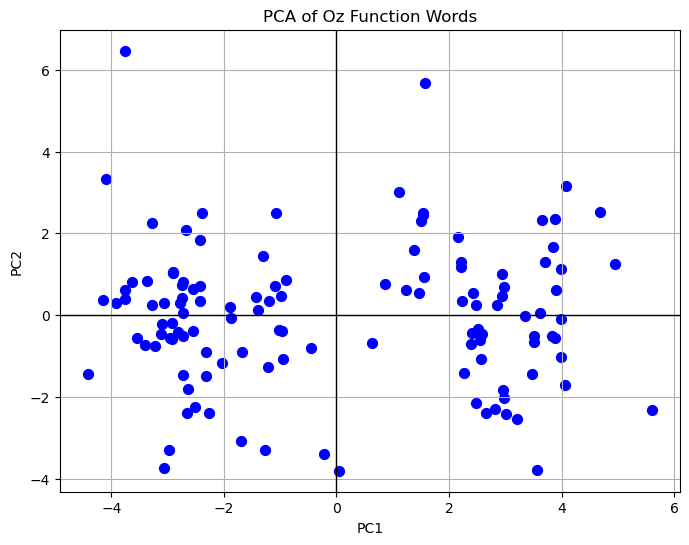

In [38]:
# Solution:

import os
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def count_words_with_relative_frequency(directory, word_list):
    word_counts = Counter()
    total_words = 0
    word_set = set(word.lower() for word in word_list)

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_table(file_path, header=None, encoding='utf-8', quoting=3, on_bad_lines='skip')
                text = ' '.join(df[0].astype(str)).lower()
                words = text.split()
                total_words += len(words)
                filtered_words = [word for word in words if word in word_set]
                word_counts.update(filtered_words)
            except Exception as e:
                print(f"Error reading {filename}: {e}")

    result = {}
    for word in word_list:
        word_lower = word.lower()
        absolute = word_counts[word_lower]
        relative = absolute / total_words if total_words > 0 else 0
        result[word] = {'absolute': absolute, 'relative': relative*100}

    return result


def generate_word_block_matrix(directory, word_list, block_size=5000):
    word_list = [word.lower() for word in word_list]
    word_set = set(word_list)
    block_word_counts = []

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_table(file_path, header=None, encoding='utf-8', quoting=3, on_bad_lines='skip')
                text = ' '.join(df[0].astype(str)).lower()
                words = text.split()
                num_blocks = len(words) // block_size

                for i in range(num_blocks):
                    block = words[i * block_size : (i + 1) * block_size]
                    block_counter = Counter(block)
                    block_counts = [block_counter[word] for word in word_list]
                    block_word_counts.append(block_counts)

            except Exception as e:
                print(f"Error reading {filename}: {e}")

    matrix = np.array(block_word_counts)
    return matrix

# Example usage
directory_path = "/Users/simonbruun-simonsen/Desktop/ML_Exercises/ML_Exercises/Week6_PCA-20251002/Oz"  # Replace with your directory
directory_path_validation = "/Users/simonbruun-simonsen/Desktop/ML_Exercises/ML_Exercises/Week6_PCA-20251002/15th book of Oz"  # Replace with your directory
function_words = [
    "the", "with", "up", "into", "just",
    "and", "but", "now", "very",
    "to", "for", "out", "down", "where",
    "at", "what", "over", "before",
    "of", "then", "back", "upon",
    "in", "if", "or", "about",
    "all", "there", "well", "after",
    "it", "on", "by", "which", "more",
    "not", "from", "who", "how", "why",
    "when", "here", "some"
]

word_freq = count_words_with_relative_frequency(directory_path, function_words)
block_matrix = generate_word_block_matrix(directory_path,function_words)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(block_matrix)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c='blue', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Oz Function Words')
plt.axhline(0, color='black', linewidth=1)  # horizontal line at y=0
plt.axvline(0, color='black', linewidth=1)
plt.grid(True)
plt.show()


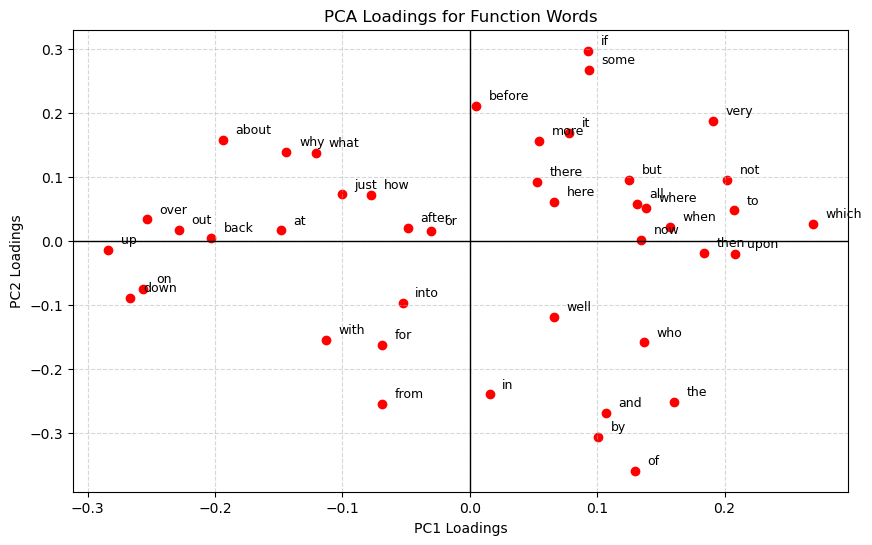

In [42]:
pve = pca.explained_variance_ratio_
pve
loadings = pca.components_
loadings = -1*loadings


plt.figure(figsize=(10,6))
plt.scatter(loadings[0], loadings[1], color='red')

# Annotate each point with the word
for i, word in enumerate(function_words):
    plt.text(loadings[0,i]+0.01, loadings[1,i]+0.01, word, fontsize=9)

plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('PCA Loadings for Function Words')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

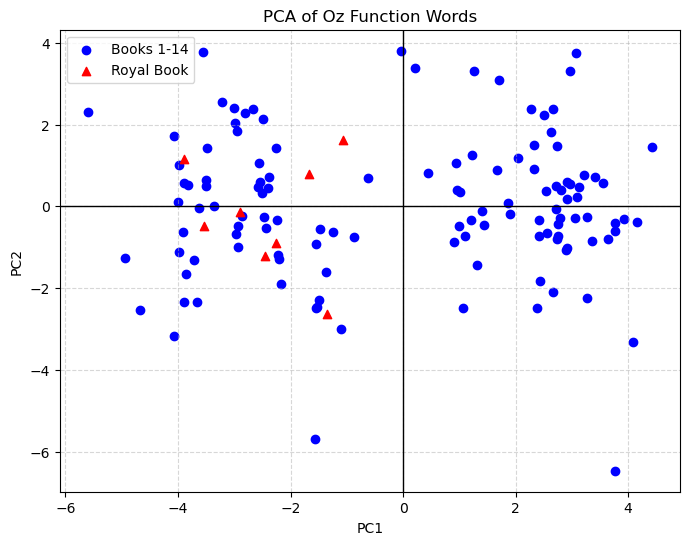

In [51]:
block_matrix_royal = generate_word_block_matrix(directory_path_validation, function_words, block_size=5000)
X_royal_scaled = scaler.transform(block_matrix_royal)
X_royal_pca = pca.transform(X_royal_scaled)


# Flip the PC axes to match the paper (usually just PC1)
X_pca_flipped = -1 * X_pca
X_royal_pca_flipped = -1 * X_royal_pca

plt.figure(figsize=(8,6))

# Books 1-14
plt.scatter(X_pca_flipped[:,0], X_pca_flipped[:,1], c='blue', marker='o', label='Books 1-14')

#(Validation)
plt.scatter(X_royal_pca_flipped[:,0], X_royal_pca_flipped[:,1], c='red', marker='^', label='Royal Book')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Oz Function Words')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


# <b>Exploring what you learned</b>

# Exercise e1



To explore the limits of Dimensionality Reduction and PCA:

1. Think about some cases for which it does not work. Why?
2. Generate the corresponding dataset to test its applicability.
   - *Hint:* What happens when the whole dataset has the same value? (np.ones())
   - *Hint:* What happens when the dimensionality is already low? (np.random.rand())
   - *Hint:* What happens when there is no correlation? (np.random.rand())
3. Plot the dataset on a pairplot.
4. Apply PCA and plot the explained variance ratio.

In [68]:
# Solution
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



x2 = np.ones((1000,10))
x2

pca = PCA(n_components=2)
pca.fit_transform(x2)
pve = pca.explained_variance_ratio_
pve # Pve will be zero because all the features are the same.

x3 = np.random.rand(100,4)
pca.fit_transform(x3)
pca.explained_variance_ratio_ #no correlation, no structure for the PVE.


/opt/anaconda3/envs/ml/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:646: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


array([0.27751384, 0.26386448])

# Exercise e2

To test the importance of having a common scale across the dataset when performing PCA:

1. Use the code below as a guide to generate one combined dataset. How many features would be inside it?
2. Inspect the data and perform PCA on it. How does it perform? How do the explained variance perform?
3. Realizing some multiplicative factors are involved, try to properly rescale the data.
4. Inspect the rescaled dataset and perform PCA on it. How does it perform? How do the explained variance perform?
   

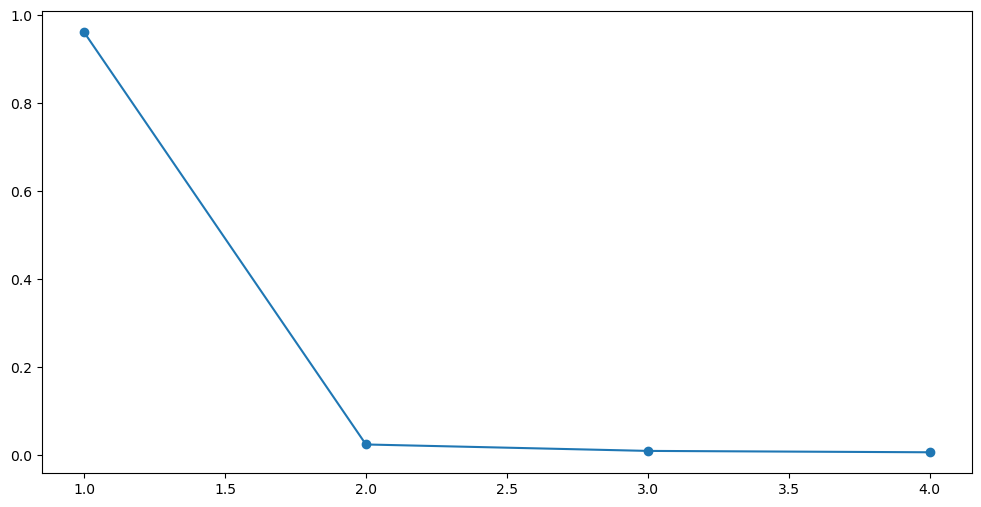

In [87]:
#Solution
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Create three Gaussian clusters with 4 features each
mean1 = [0, 0, 0, 0]
cov1 = np.diag([3, 2, 1, 0.5])
cluster1 = np.random.multivariate_normal(mean1, cov1, 100)

mean2 = [10, 10, 10, 10]
cov2 = np.diag([3, 2, 1, 0.5])
cluster2 = np.random.multivariate_normal(mean2, cov2, 100) / 100  # Scaled down

mean3 = [0, 10, 0, 10]
cov3 = np.diag([3, 2, 1, 0.5])
cluster3 = np.random.multivariate_normal(mean3, cov3, 100) * 100  # Scaled up
combined = np.vstack([cluster1, cluster2, cluster3])
pca = PCA()

#sns.scatterplot(cluster1)
#sns.scatterplot(cluster2)
#sns.scatterplot(cluster3)

pca.fit_transform(combined)
PVE_clust1 = pca.explained_variance_ratio_


plt.figure(figsize=(12,6))
plt.plot(range(1, len(PVE_clust1) + 1), 
         PVE_clust1, 
         marker='o')


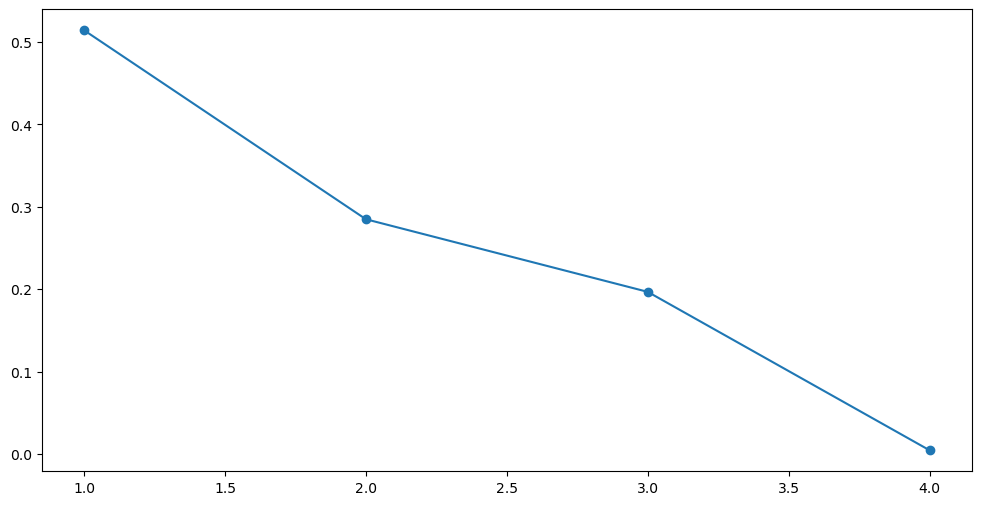

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

combined_scaled = scaler.fit_transform(combined)

pca = PCA()

#cluster1
pca.fit_transform(combined_scaled)
PVE_clust1 = pca.explained_variance_ratio_

plt.figure(figsize=(12,6))
plt.plot(range(1, len(PVE_clust1) + 1), 
         PVE_clust1, 
         marker='o')


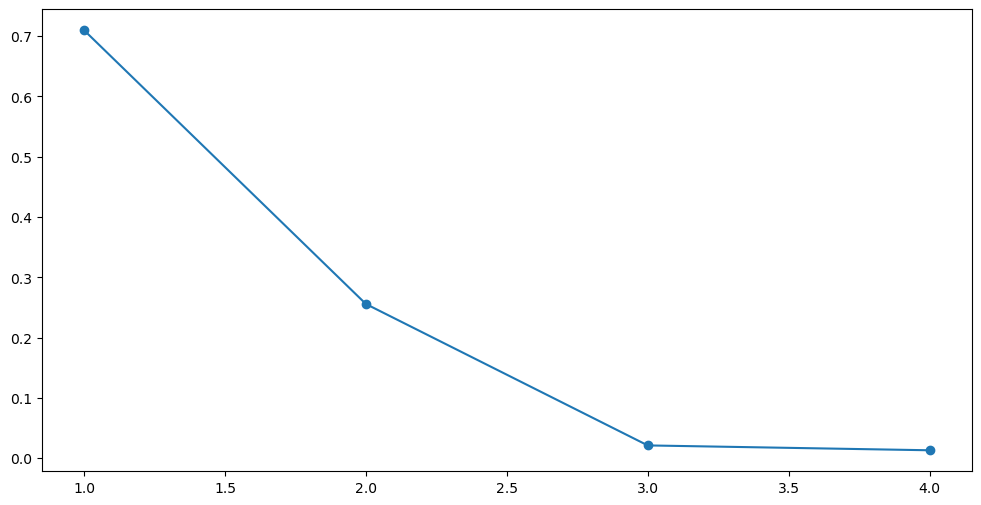

In [93]:
clust2 = cluster2*100
clust3 = cluster3/100

combined = np.vstack([cluster1, clust2, clust3])

pca.fit_transform(combined)

pve_comb = pca.explained_variance_ratio_

plt.figure(figsize=(12,6))
plt.plot(range(1, len(pve_comb) + 1), 
         pve_comb, 
         marker='o')

# Exercise e3


To evaluate the importance of standardize a dataset before performing PCA:

1. Use the code below as a guide to build a *raw* dataset.
2. Apply PCA directly to the *raw* data and plot the explained variance. How does it perform?
3. Apply sklearn.preprocessing.StandardScaler to the data. Apply PCA and compare it to the *raw* case. How does it fare?
   - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
5. EXTRA: Can you think about other methods to standardize data? Use them, apply PCA and plot the explained variance. Compare it to the previous cases.

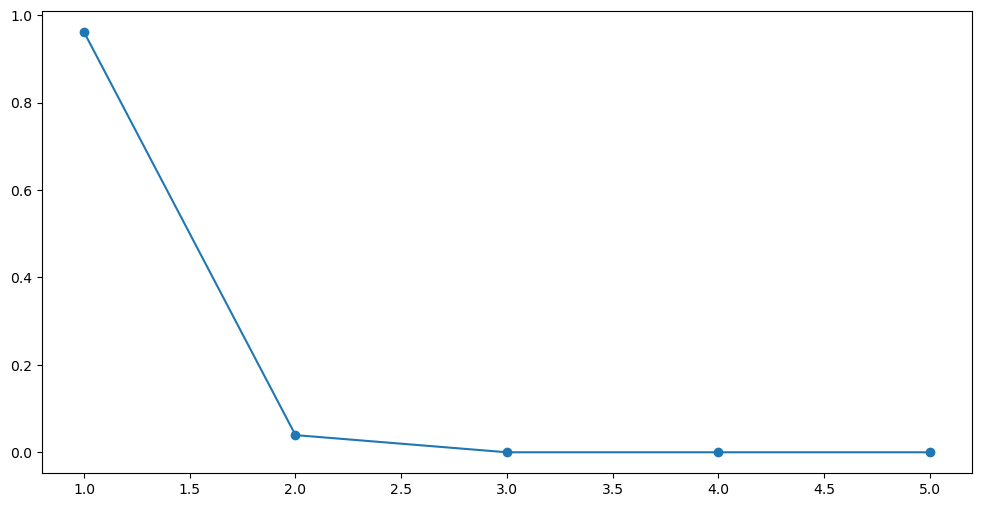

In [94]:
#Solution: 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

#et random seed for reproducibility
np.random.seed(42)

#Simulate high-dimensional data with varying scales
data = pd.DataFrame({
    'Feature1': np.random.normal(1000, 100, 100),
    'Feature2': np.random.normal(10, 1, 100),
    'Feature3': np.random.normal(0.1, 0.01, 100),
    'Feature4': np.random.normal(5000, 500, 100),
    'Feature5': np.random.normal(0.5, 0.05, 100)
})

pca = PCA()
pca.fit_transform(data)
pve_data = pca.explained_variance_ratio_

plt.figure(figsize=(12,6))
plt.plot(range(1, len(pve_data) + 1), 
         pve_data, 
         marker='o')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


# Exercise e4

To understand how feature selection works and how that impact classification:

1. Use the code below as a guide to generate a dataset with n_features=20.
2. Apply PCA with an increasing number of features until all are covered.
3. Train a Logistic Regression on every PCA performed in point 2.
4. Plot the accuracy of Logistic Regression vs the number of feature. How does it perform? How many features would you select to have a good classifier?
5. Make a *scree plot* of the explained variance against the munber of features. How many features would you select to have a good classifier?

In [ ]:
# Solution :

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.datasets import make_classification
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

# Simulate synthetic classification data
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
